In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow import keras 

In [13]:
(X_train , y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
type(X_train)

numpy.ndarray

In [17]:
len(X_train)

60000

In [21]:
len (y_train)

60000

In [23]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [45]:
X_train = X_train/255 ## scaled the values we know the values are btwn 0 and 255 so dividing them by 255 scales them btwn 0 and 1 
X_test = X_test/255

In [47]:
#flatten our traingin dataset cuz we need to conver it into a single dimensional array cuz we nned to feed it to the nerual net 

X_train_flattened = X_train.reshape(len(X_train),28*28)

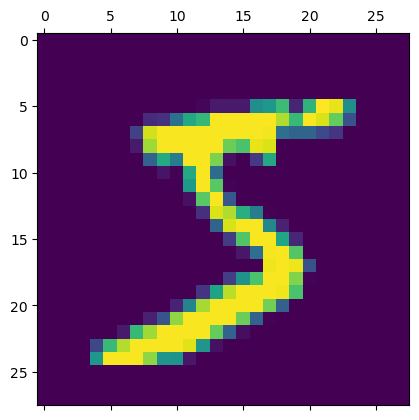

In [49]:
plt.matshow(X_train[0])

In [51]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [53]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8180 - loss: 0.7076
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.3114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9206 - loss: 0.2829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9235 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9255 - loss: 0.2669


In [55]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.3056


[0.2684483528137207, 0.925000011920929]

In [65]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
y_predicted[0]

array([2.39450168e-02, 2.59764448e-07, 9.07931775e-02, 9.54413533e-01,
       1.68967259e-03, 1.24570064e-01, 6.99690929e-07, 9.99813676e-01,
       8.76726732e-02, 6.76184893e-01], dtype=float32)

In [75]:
y_predicted[0].max()

0.9998137

In [77]:
np.argmax(y_predicted[0])

7

In [79]:
#nned to convert the predictions to concrete class labels
y_predicted_labels = [ np.argmax(i) for i in y_predicted ]

In [87]:
cm =tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels )

Text(95.72222222222221, 0.5, 'Truth')

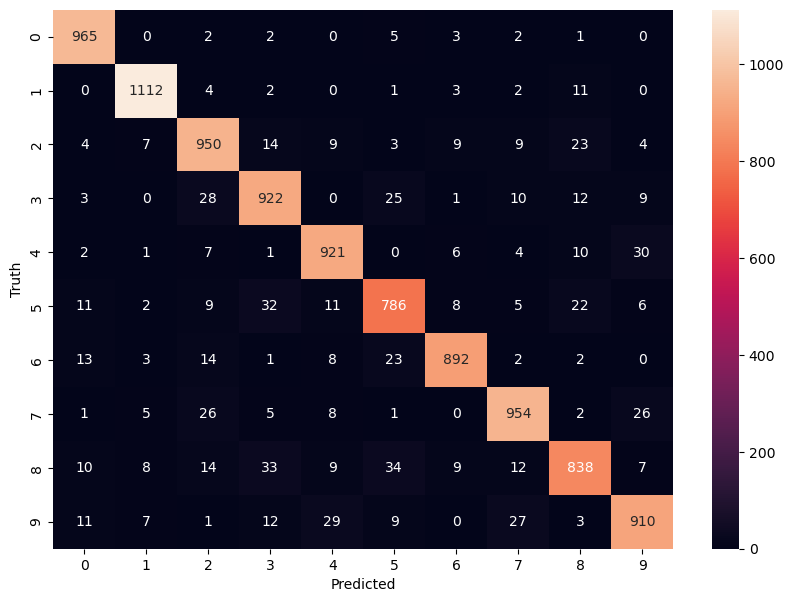

In [89]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#basically tells us how much time the predictions were right like it predicted 950 times right that it was a 2 bascially the diagonal values
# anything other than diagonal values are wrong predictions numbers 


In [93]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),#adding a relu layer 
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\kulu1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8710 - loss: 0.4492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9603 - loss: 0.1358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0926
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9788 - loss: 0.0684
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0497


In [95]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='tanh'),#adding a relu layer 
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8742 - loss: 0.4524
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9558 - loss: 0.1534
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9697 - loss: 0.1051
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0777
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0560


In [105]:
model = keras.Sequential([
    keras.layers.flat
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),#adding a relu layer 
    keras.layers.Dense(10,activation='sigmoid')
    
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']  
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8549 - loss: 0.6341
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9613 - loss: 0.1468
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9742 - loss: 0.0946
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0530
